# Image preproccessing

This code can take in a image that has grid items in it and crop all the induvidual grids out. It also incorparates canny edge detection to make to images black and white only

In [31]:
#importing the useful libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Edge Detection First

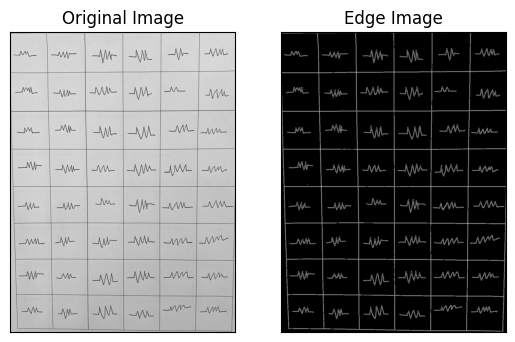

In [32]:
img = cv.imread('TestImagesResistors.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges1 = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

# Cropping the Images

This will take the grid and make it into induvidaul images that only have one item in it

In [33]:
#Takes in filtered images and converts them to an array of cropped images
def cropImage(img,List):
    [hight,width] = img.shape #getting the shape to 
    indexh = int((hight/8))
    indexw = int((width/6))
    offset = 50 # This is the only values that might need tuning for different cameras
    Resistors = [] #making an empty list

    h = np.linspace(1,8,8,dtype=int) # making an array from 1 to 8 these are the rows
    w = np.linspace(1,6,6,dtype=int) # making an array from 1 to 6 these are the columns 
    for y in h:
        for x in w:
            middleY = int(indexh*y - indexh/2) # finding the middle of the block
            middleX = int(indexw*x - indexw/2)
            crop_image = img[middleY-offset:middleY+offset, middleX-offset:middleX+offset] #cropping a square inside the block
            #outfile = "Test"+ str(y) + "_" + str(x)+ ".jpg" #formatting the filename
            #cv.imwrite(outfile, crop_image) # don't need to actually save the image as a file, but for testing its nice
            List.append(crop_image) #adding the list to the array
    return List

# Testing the Resistors List

C:\Users\tlgwo\AppData\Local\Temp\ipykernel_10832\3605825469.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figs[idx]=plt.figure()


<Figure size 640x480 with 0 Axes>

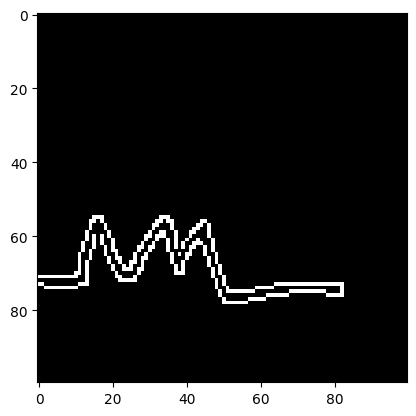

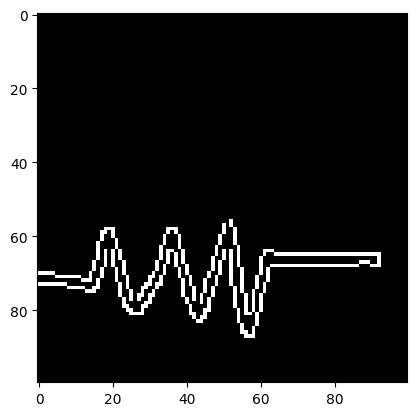

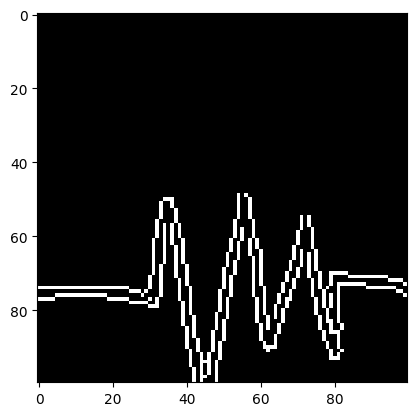

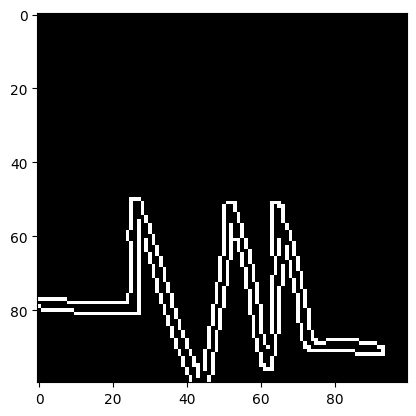

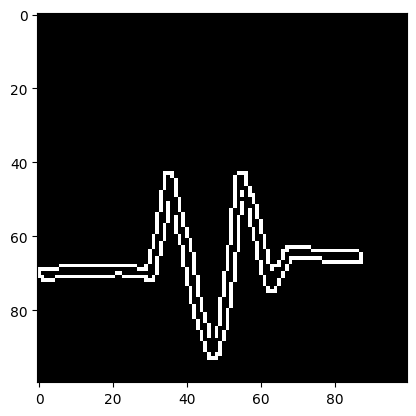

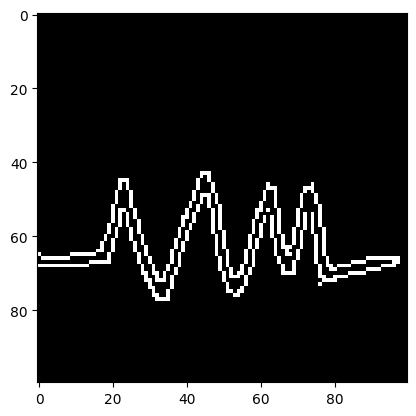

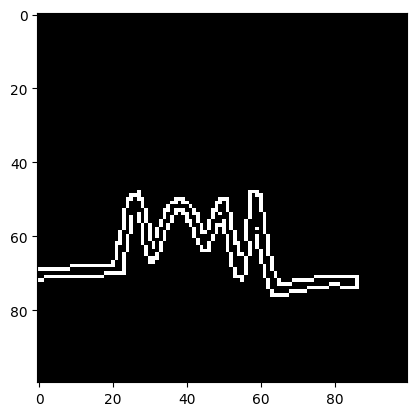

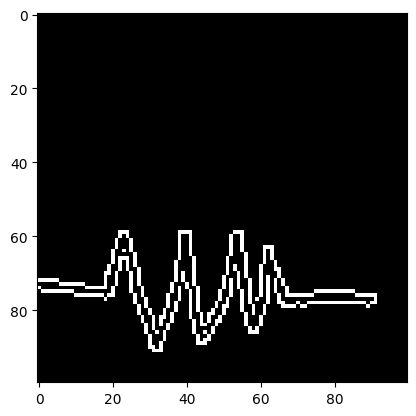

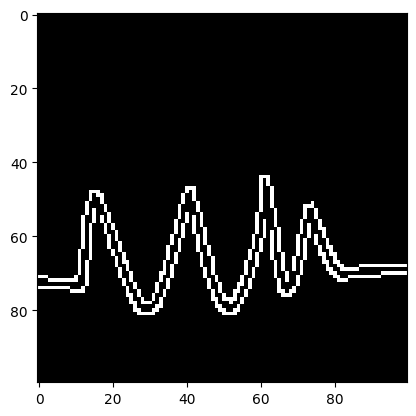

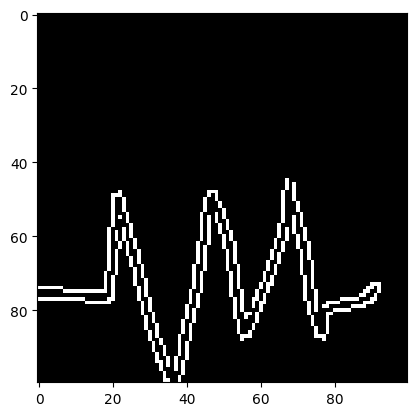

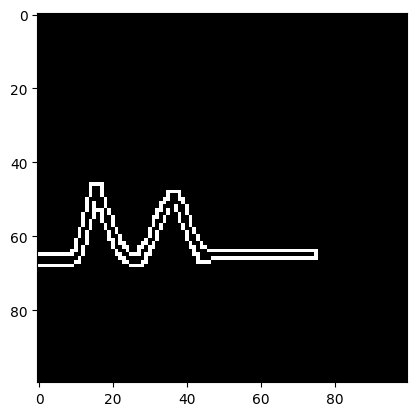

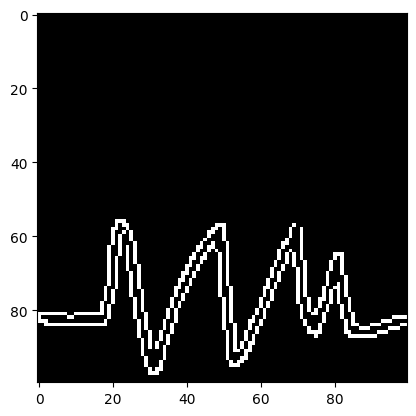

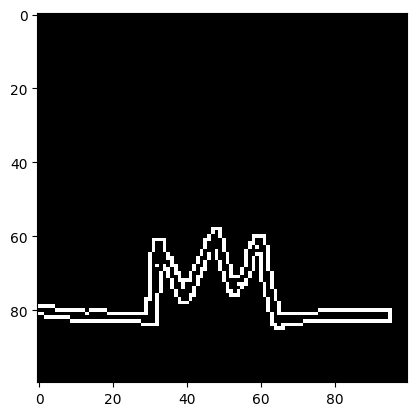

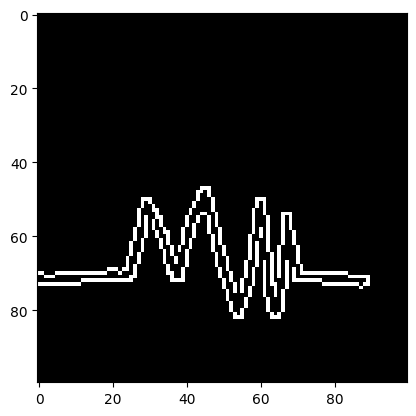

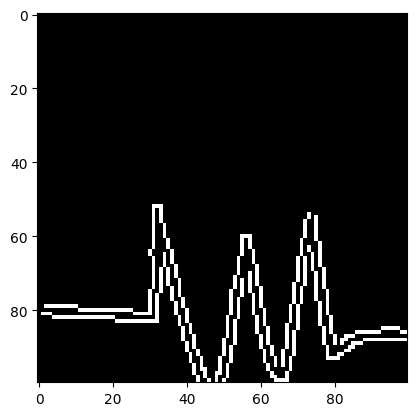

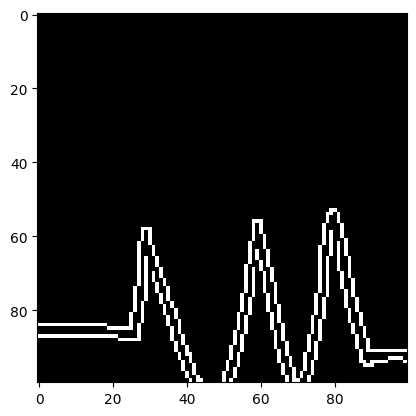

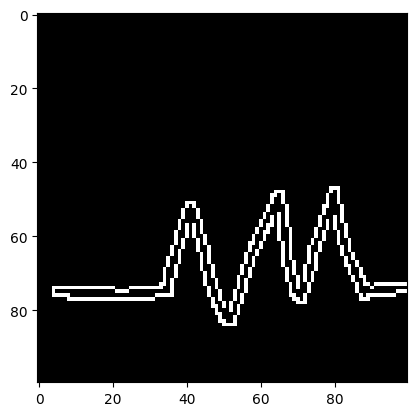

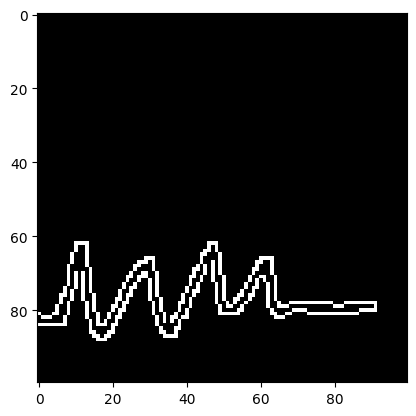

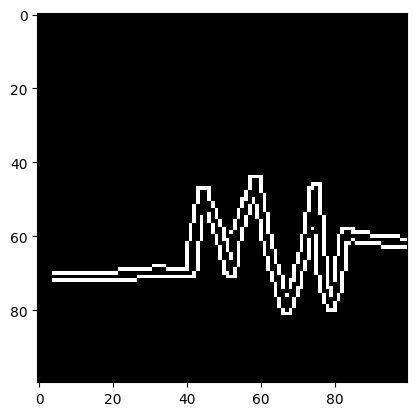

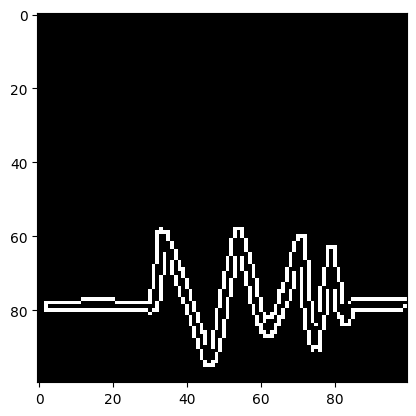

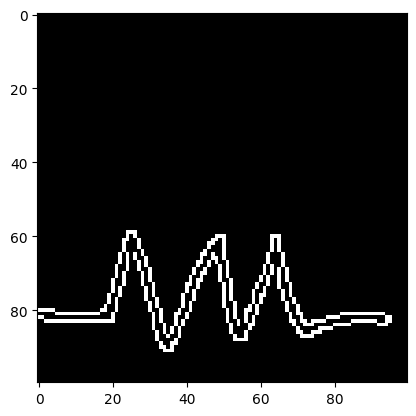

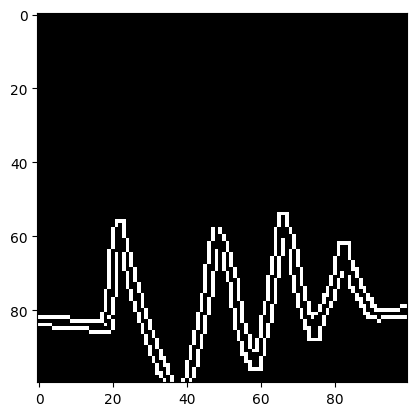

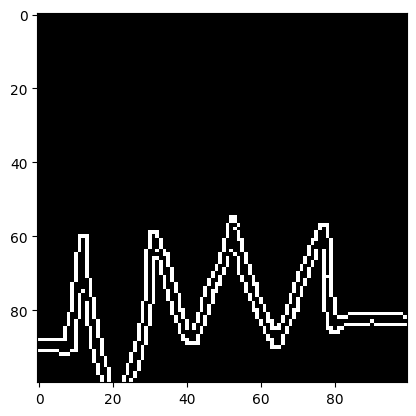

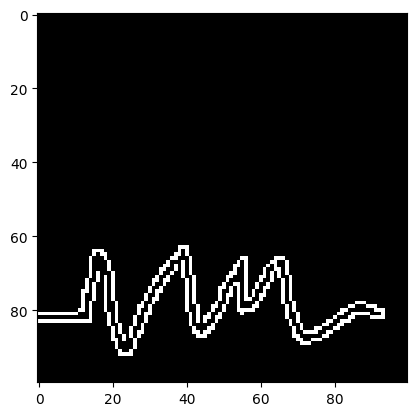

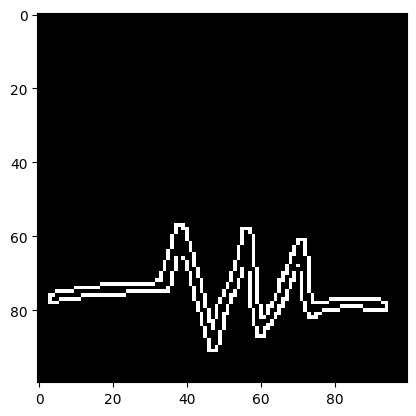

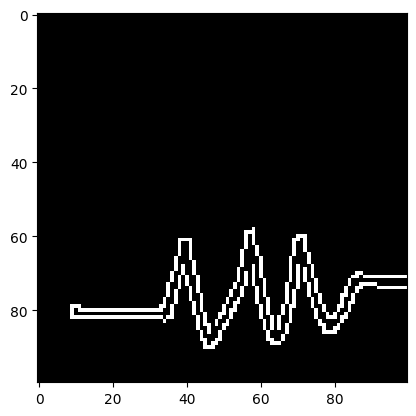

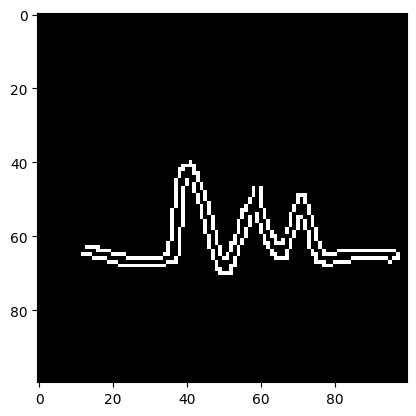

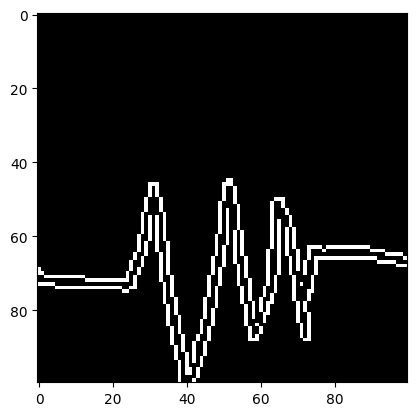

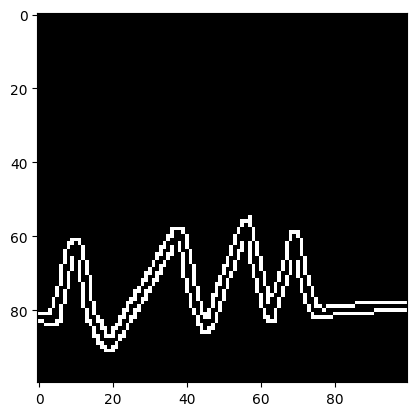

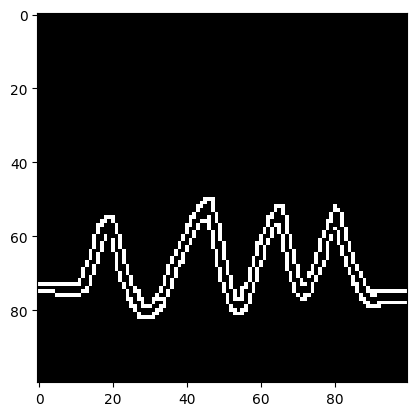

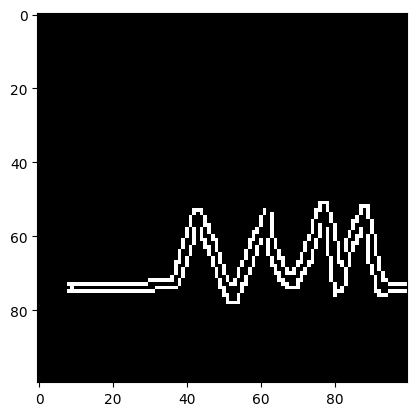

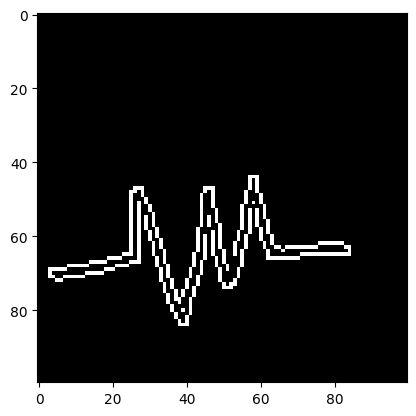

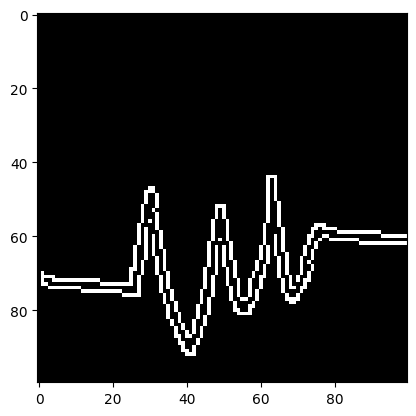

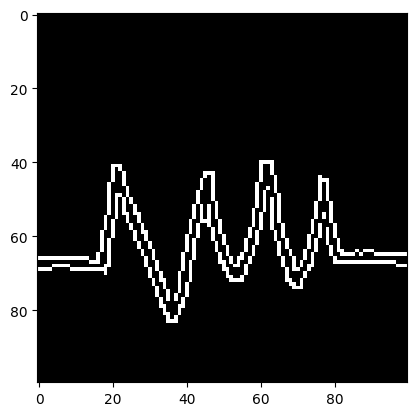

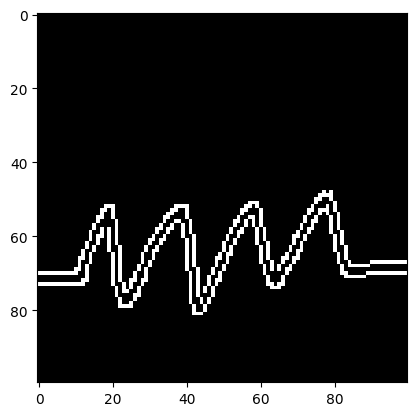

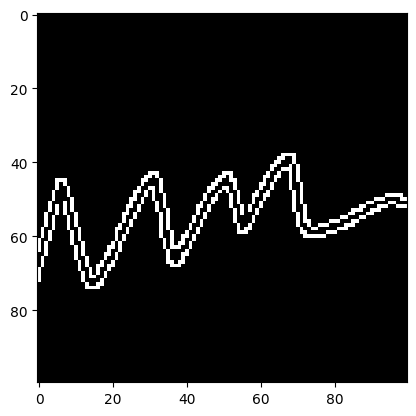

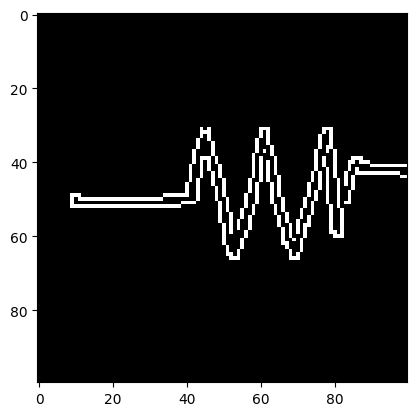

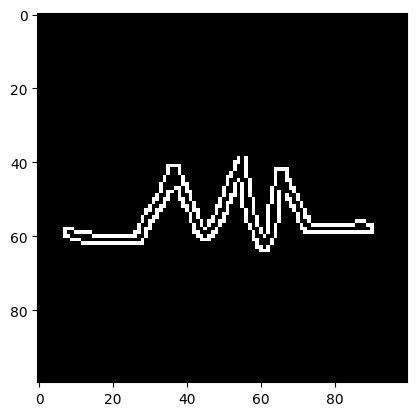

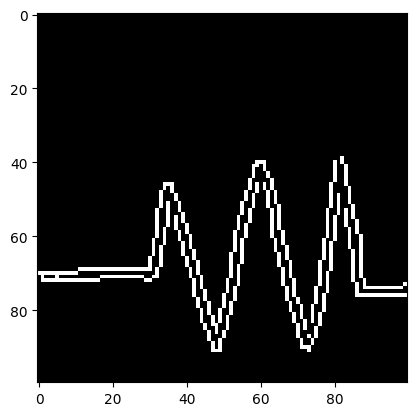

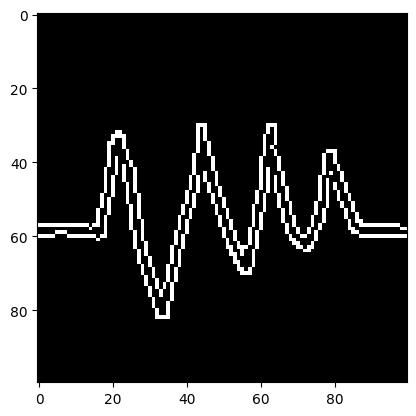

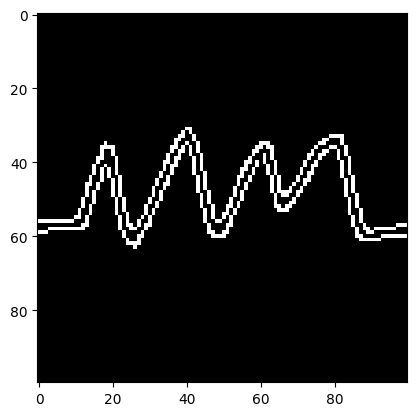

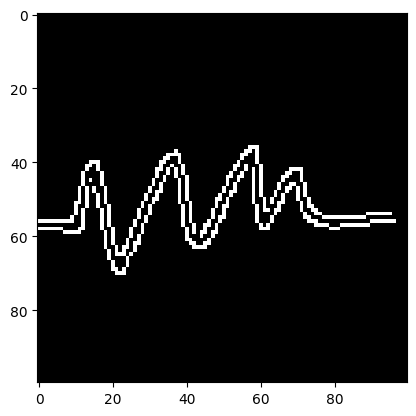

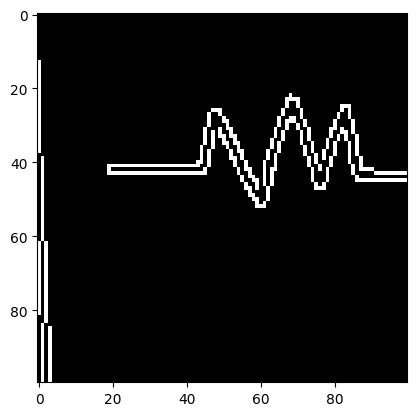

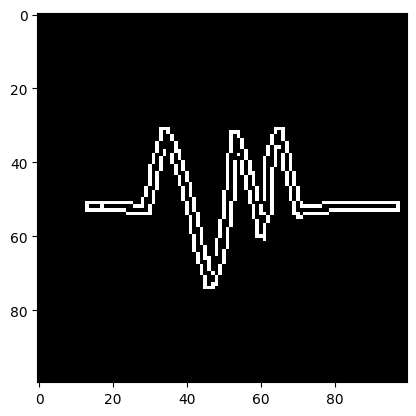

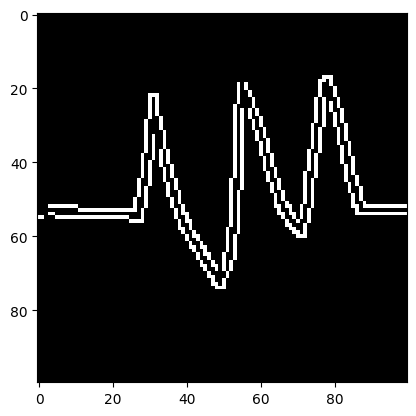

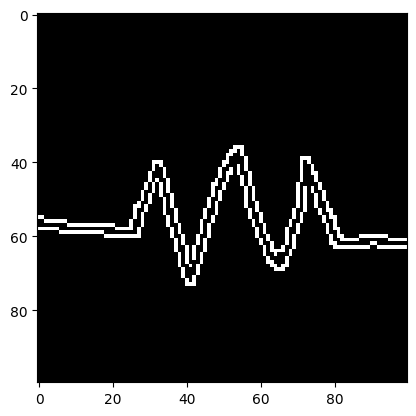

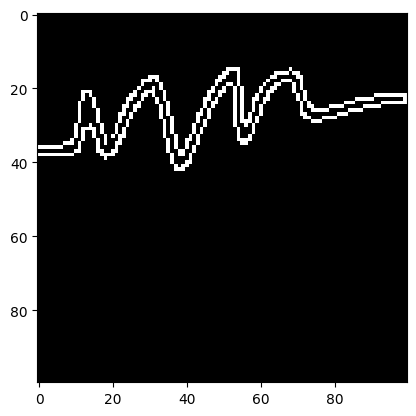

In [35]:
Resistors = []
Resistors = cropImage(edges1,Resistors)

plt.figure()

def loop_plot(Resistors):
    figs={}
    axs={}
    for idx in range(47):
        ResistorsUncolored = cv.cvtColor(Resistors[idx], cv.COLOR_BGR2RGB)
        figs[idx]=plt.figure()
        axs[idx]=figs[idx].add_subplot(111)
        plt.subplot(),plt.imshow(ResistorsUncolored)
    return figs, axs  
        
figs, axs = loop_plot(Resistors)


#can alternatively just plot the resistors directly using plt.imshow(Resistores[indexItem]) but the colors are weird